[View in Colaboratory](https://colab.research.google.com/github/lycohen/ds_desafio_I/blob/master/Desafio_I_palabras_predictoras.ipynb)

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.feature_extraction.text import CountVectorizer
#import unidecode
#import re
#from unidecode import unidecode #QUITO TILDES
# Code to read csv file into colaboratory:
df = pd.read_csv('properatti.csv') 


In [0]:
import re
def isUrl(x):
    p = re.compile(r'(http://www.properatti.com(.*))(\?.*)?')
    return bool(p.search(x) )

def isNumero(x):
    p = re.compile(r'\d')
    return bool(p.search(x)) 

def esConector(x):
    claves=['venta','piso','pisos','departamento','casa','las','están','del','la','los','que','se','al','por','para','-','el','la','cada','por,''u$s','usd','través','.',',',' ','nan','o','ambientes','ambiente','si','ante','amb','una','uno','dos','tres','cuatro','un','cinco','seis','gran','muy','x','es','son','y','de','en','con','hasta','a']
    return (x in claves)
 



In [0]:
df2=df
df2 =df.sample(10000)


serieCompleta = df2.properati_url.str.replace('_',' ').str.lower().append( df2.title)
serieCompleta = serieCompleta.append(df2.description.str.lower())


In [0]:
pdClaves = pd.DataFrame(serieCompleta)



In [0]:
dfClaves = pdClaves[0].str.split(expand=True).drop_duplicates().stack().value_counts()

In [0]:
dfClaves = pd.DataFrame(data=[dfClaves.values,dfClaves.index]).T

In [0]:
dfClaves =dfClaves[~dfClaves[1].isin(['venta','piso','pisos','departamento','casa','las','del','la','los','que','se','al','por','si','no','para','-','el','la','cada','por,''u$s','usd','través','.',',',' ','nan','o','ambientes','ambiente','amb','uno','dos','tres',
                            'cuatro','un','cinco','seis','gran','muy','x','es','son','y','de','en','con','hasta','a','están'])]

In [0]:
dfClaves = pd.DataFrame(data=dfClaves)

In [0]:
dfClaves.rename(columns={dfClaves.columns.values[0]: "cant", dfClaves.columns.values[1]: "clave"},inplace=True)



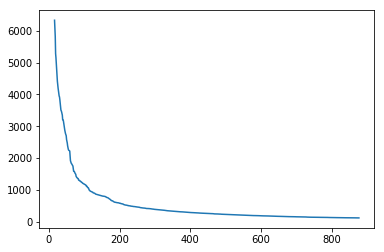

In [0]:
dfClaves[(dfClaves.cant > dfClaves.cant.std()*1.5 ) & (~dfClaves.clave.apply(isUrl))  & (~dfClaves.clave.apply(isNumero))  & ~dfClaves.clave.apply(esConector) ].cant.plot(kind='line');

In [0]:
dfClaves[(dfClaves.cant > dfClaves.cant.std()*1.5 ) & (~dfClaves.clave.apply(isUrl))  & (~dfClaves.clave.apply(isNumero))  & ~dfClaves.clave.apply(esConector) ]

,cant,clave
16,6327,cocina
18,5818,baño
19,5278,lavadero
20,5149,garage
24,4416,comedor
26,4202,balcon
29,3951,suite
30,3922,parrilla
31,3835,living
34,3509,terraza
